In [1]:
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
import matplotlib.pyplot as plt 
import statistics 
import math

price = pd.read_excel(r'C:\Users\ASUS\Desktop\ex_price.xlsx')
#price = price.fillna(0)
#price9 = price.iloc[2253:,:]
MA5 = price['5MA'].values
MA20 = price['20MA'].values
MA60 = price['60MA'].values
MA250 = price['250MA'].values
openp = price['open'].values
high = price['high'].values
low = price['low'].values
close = price['close'].values
date = price['date'].values

div5 = (close - MA5)*100/close
div20 = (close - MA20)*100/close
div60 = (close - MA60)*100/close
div250 = (close - MA250)*100/close

def analysis(single_result,keep_day,principal):
    back_test = {}
    #principal = 150000

    win = 0
    for i in range(0,len(single_result)):
        if single_result[i] > 0 :
            win = win + 1
    win_rate = win / len(single_result)

    import statistics as st
    back_test['ret_rate'] = single_result/principal
    back_test['cum_ret'] = np.cumsum(single_result/principal)
    back_test['max_ret'] = max(single_result/principal)
    back_test['min_ret'] = min(single_result/principal)
    back_test['stdev_ret'] = st.stdev(single_result/principal)
    back_test['win_rate'] = win_rate
    back_test['ave_keeping'] = st.mean(keep_day)
    return back_test
def analysis0(single_result,principal):
    back_test = {}
    #principal = 150000

    win = 0
    for i in range(0,len(single_result)):
        if single_result[i] > 0 :
            win = win + 1
    win_rate = win / len(single_result)

    import statistics as st
    back_test['ret_rate'] = single_result/principal
    back_test['cum_ret'] = np.cumsum(single_result/principal)
    back_test['max_ret'] = max(single_result/principal)
    back_test['min_ret'] = min(single_result/principal)
    back_test['stdev_ret'] = st.stdev(single_result/principal)
    back_test['win_rate'] = win_rate
    return back_test

In [19]:
### Simple one ###

price = pd.read_excel(r'C:\Users\ASUS\Desktop\ex_price20.xlsx')
price = price.fillna(0)
price = price.iloc[2253:,:]
MA5 = price['5MA'].values
MA20 = price['20MA'].values
MA60 = price['60MA'].values
MA250 = price['250MA'].values
openp = price['open'].values
high = price['high'].values
low = price['low'].values
close = price['close'].values
date = price['date'].values

div5 = (close - MA5)*100/close
div20 = (close - MA20)*100/close
div60 = (close - MA60)*100/close
div250 = (close - MA250)*100/close

holding = {'number':0,'ave_cost':0,'realized':0,'trading':0}
unrealized = np.array([0])
returns = np.array([])
cummulative = 0
trading = 0
keep_day = np.array([])
keep = np.array([1])
colors = np.array(['yellow'])
days = 0
single_result = np.array([])
for i in range(1,len(date)):
    spread_ed = MA5[i-1] - MA20[i-1]
    spread_today = MA5[i] - MA20[i]
    if spread_ed < 0 :
        if spread_today > 0:
            holding['number'] = 1
            holding['ave_cost'] = close[i]
            holding['trading'] = holding['trading'] + 1
    if spread_ed > 0 :
        if spread_today < 0 :
            holding['realized'] = holding['realized'] + (close[i] - holding['ave_cost'])*200
            holding['number'] = 0
            holding['ave_cost'] = 0
            holding['trading'] = holding['trading'] + 1
    unrealized = np.append(unrealized,(close[i] - holding['ave_cost'])*holding['number']*200)
    #print((close[i] - holding['ave_cost'])*holding['number']*200)
    keep = np.append(keep , holding['number'])
    if holding['number'] == 1 :
        colors = np.append(colors , 'gray')
    if holding['number'] == 0 :
        colors = np.append(colors , 'lightgreen')
    if abs(unrealized[i-1]) > 0.9 :
        days = days + 1
        if abs(unrealized[i]) < 0.9 :
            single_result = np.append(single_result,unrealized[i-1])
            cummulative = cummulative + unrealized[i-1]
            keep_day = np.append(keep_day,days)
            days = 0
    returns = np.append(returns,(close[i]-holding['ave_cost'] )*200*holding['number']/(holding['ave_cost']*holding['number']*200))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in double_scalars


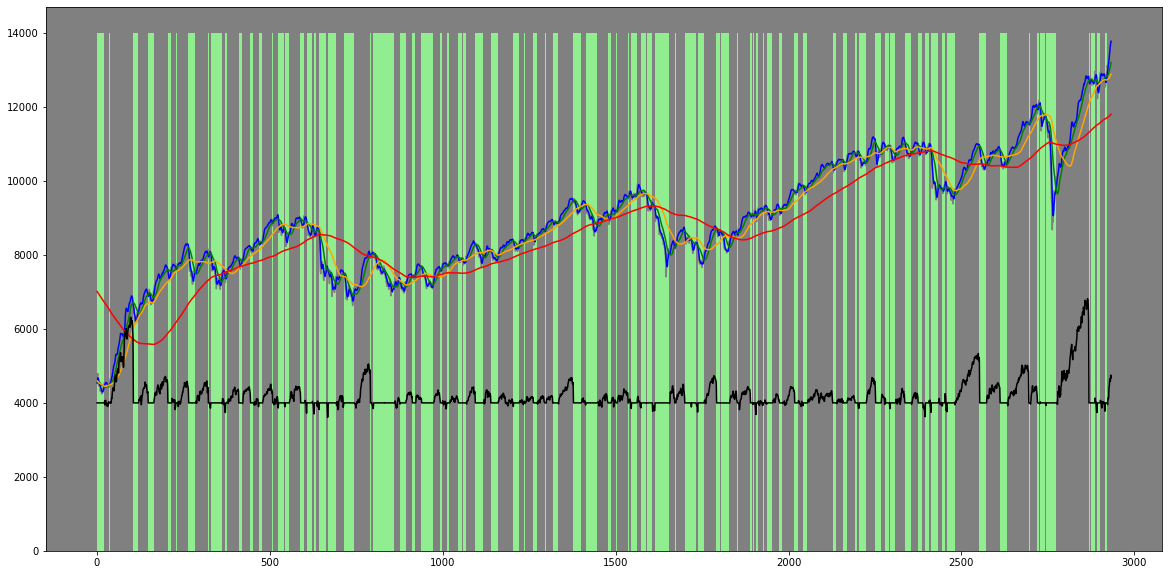

In [21]:
x = np.arange(0,len(date),1)
basic = np.zeros(len(date))
fig = plt.figure(figsize=(20,10))
ax =fig.add_subplot(1,1,1)
ax.bar(x , keep+14000 , color = colors,width = 1.5)
ax.plot(x,close,c='gray',label='close')
ax.plot(x , MA5,c='blue',label='5MA')
ax.plot(x , MA20,c='green',label='20MA')
ax.plot(x , MA60,c='orange',label='60MA')
ax.plot(x , MA250,c='red',label='250MA')

ax.plot(x,(unrealized/200)+4000 ,c='black')
ax.set_facecolor('gray')
fig.savefig('one_position.png')

In [63]:
holding

{'number': 1,
 'ave_cost': 13127.47,
 'realized': 1845567.9999999995,
 'trading': 180}

In [5]:
analysis(single_result,keep_day,2000000)

{'ret_rate': array([ 0.003105,  0.177719,  0.03039 ,  0.049418, -0.00217 ,  0.035223,
         0.041278, -0.014219, -0.026172,  0.033179,  0.023891, -0.003102,
         0.029777, -0.013902, -0.010712,  0.028752, -0.027841, -0.029638,
        -0.01806 , -0.022875, -0.006104,  0.089198, -0.014332,  0.000763,
        -0.002359,  0.017364,  0.01202 ,  0.011256, -0.004635,  0.007747,
         0.029267,  0.019652,  0.014816, -0.009682,  0.004497,  0.000611,
         0.002094, -0.000545,  0.055318, -0.005715,  0.003831,  0.000639,
         0.025964, -0.014971, -0.013377, -0.001143, -0.021241,  0.013175,
         0.018454, -0.011041, -0.024902,  0.053675,  0.006267,  0.027369,
        -0.004171, -0.031201, -0.005904, -0.003387,  0.005215,  0.029007,
        -0.007627,  0.021635,  0.007914,  0.006293,  0.004273, -0.014102,
         0.037861,  0.012197, -0.015494,  0.004521,  0.016623, -0.037377,
        -0.025528, -0.008343, -0.024049,  0.116431,  0.041461,  0.086798,
         0.021955,  0.0026

In [23]:
### Couple Long Position ###

holding = {'number':1,'ave_cost':close[0],'realized':0,'trading':0}
unrealized = np.array([0])
returns = np.array([1])
trading = 0
cummulative = 0
keep_day = np.array([])
keep = np.array([0])
colors = np.array(['yellow'])
days = 0
single_result = np.array([])
for i in range(1,len(date)):
    spread_ed = [(MA5[i-1] - MA20[i-1]),(MA5[i-1] - MA60[i-1])]
    spread_today = [(MA5[i] - MA20[i]),(MA5[i]-MA60[i])]
    if spread_ed[0] < 0 :
        if spread_today[0] > 0:
            holding['number'] = holding['number'] + 1
            holding['ave_cost'] = (holding['ave_cost']*(holding['number']-1) + close[i])/holding['number']
            holding['trading'] = holding['trading'] + 1
    if spread_ed[1] < 0 :
        if spread_today[1] > 0:
            holding['number'] = holding['number'] + 1
            holding['ave_cost'] = (holding['ave_cost']*(holding['number']-1) + close[i])/holding['number']
            holding['trading'] = holding['trading'] + 1
    if spread_ed[0] > 0 :
        if spread_today[0] < 0 :
            holding['number'] = holding['number'] - 1
            holding['realized'] = holding['realized'] + (close[i] - holding['ave_cost'])*200
            single_result = np.append(single_result,(close[i] - holding['ave_cost'])*200)
            holding['trading'] = holding['trading'] + 1
    if spread_ed[1] > 0 :
        if spread_today[1] < 0 :
            holding['number'] = holding['number'] - 1
            holding['realized'] = holding['realized'] + (close[i] - holding['ave_cost'])*200
            holding['trading'] = holding['trading'] + 1
            single_result = np.append(single_result,(close[i] - holding['ave_cost'])*200)
    unrealized = np.append(unrealized,(close[i] - holding['ave_cost'])*holding['number']*200)
    keep = np.append(keep,holding['number'])
    if holding['number'] == 2 :
        colors = np.append(colors , 'pink')
    if holding['number'] == 1 :
        colors = np.append(colors , 'lightgreen')
    if holding['number'] == 0 :
        colors = np.append(colors , 'gray')
    if abs(unrealized[i]) < 0.9 :
        days = days + 1
        if abs(unrealized[i-1]) > 0.9 :
            cummulative = cummulative + unrealized[i-1]
            keep_day = np.append(keep_day,days)
            days = 0

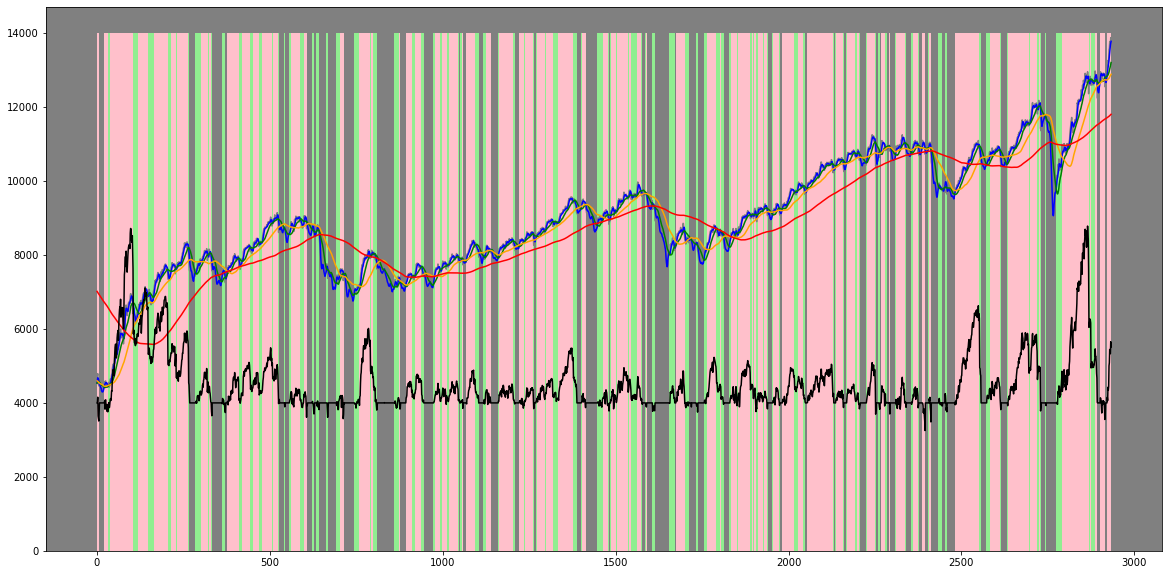

In [18]:
x = np.arange(0,len(date),1)
basic = np.zeros(len(date))
fig = plt.figure(figsize=(20,10))
ax =fig.add_subplot(1,1,1)
ax.bar(x , (keep+14000),color = colors,width = 1.5)
ax.plot(x,close,c='gray',label='close')
ax.plot(x , MA5,c='blue',label='5MA')
ax.plot(x , MA20,c='green',label='20MA')
ax.plot(x , MA60,c='orange',label='60MA')
ax.plot(x , MA250,c='red',label='250MA')


ax.plot(x,(unrealized/200)+4000,c='black' )
ax.set_facecolor('gray')
fig.savefig('two_position.png')

In [24]:
holding

{'number': 2,
 'ave_cost': 13050.5,
 'realized': 1803913.9999999998,
 'trading': 275}

In [25]:
analysis0(single_result,4000000)

{'ret_rate': array([-0.01294425, -0.00902125, -0.00286425, -0.00641287,  0.09333131,
         0.06608566,  0.05210758,  0.03426929,  0.02716864,  0.00880464,
         0.01359125,  0.00127587, -0.01797762, -0.009252  ,  0.005639  ,
         0.01844525,  0.01075238,  0.03255294, -0.00090403,  0.00425097,
        -0.00911   , -0.00535025,  0.00466187, -0.00208013, -0.0039155 ,
        -0.0126545 , -0.0151545 , -0.015423  , -0.0104695 ,  0.00017275,
        -0.00673375, -0.0077015 ,  0.0439475 ,  0.021439  ,  0.00190225,
        -0.01168725, -0.0031185 , -0.0101855 , -0.0101855 ,  0.0076965 ,
         0.0110955 ,  0.003521  ,  0.0023185 ,  0.00442125,  0.00340412,
         0.00264812, -0.00732225, -0.00853475,  0.01906625, -0.00094175,
        -0.0013415 , -0.0013415 ,  0.0077685 ,  0.00359425, -0.00529125,
         0.001195  , -0.00780325, -0.00165975,  0.00467075,  0.00819712,
         0.00204406,  0.03358003,  0.01581053, -0.0081925 , -0.0081925 ,
        -0.00106075, -0.00849575,  0.00

In [26]:
### Allowing short position ###
holding = {'number':0,'ave_cost':0,'realized':0,'trading':0}
unrealized = np.array([0])
keep_day = np.array([])
keep = np.array([0])
colors = np.array(['black'])
days = 0
single_result = np.array([])
for i in range(1,len(date)):
    spread_ed = [(MA5[i-1] - MA20[i-1]),(MA5[i-1] - MA60[i-1])]
    spread_today = [(MA5[i] - MA20[i]),(MA5[i]-MA60[i])]
    if spread_ed[0] < 0 :
        if spread_today[0] > 0:
            number0 = holding['number']
            holding['number'] =  1
            holding['realized'] = holding['realized'] + number0*(close[i] - holding['ave_cost'])*200
            single_result = np.append(single_result,number0*(close[i] - holding['ave_cost'])*200)
            holding['ave_cost'] = close[i]
            holding['trading'] = holding['trading'] + 1
    if spread_ed[0] > 0 :
        if spread_today[0] < 0 :
            number0 = holding['number']
            holding['number'] = -1
            holding['realized'] = holding['realized'] + (close[i] - holding['ave_cost'])*number0*200
            single_result = np.append(single_result,number0*(close[i] - holding['ave_cost'])*200)
            holding['ave_cost'] = close[i]
            holding['trading'] = holding['trading'] + 1
    unrealized = np.append(unrealized,(close[i] - holding['ave_cost'])*holding['number']*200)
    keep = np.append(keep,holding['number'])
    if holding['number'] == 1 :
        colors = np.append(colors,'pink')
    if holding['number'] == -1 :
        colors = np.append(colors,'lightgreen')

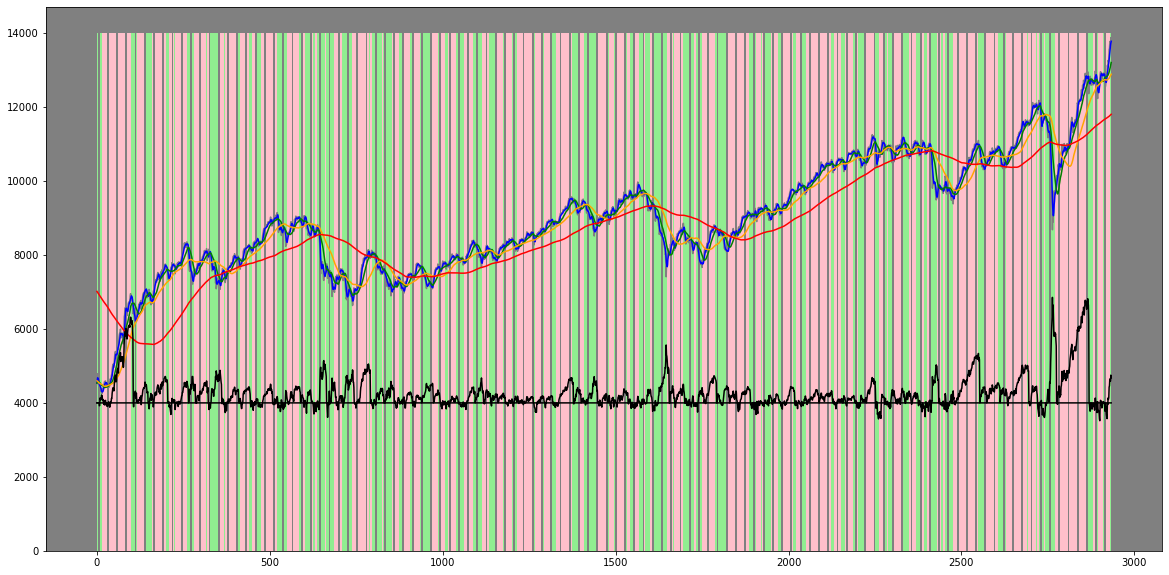

In [7]:
x = np.arange(0,len(date),1)
basic = np.zeros(len(date))
fig = plt.figure(figsize=(20,10))
ax =fig.add_subplot(1,1,1)
ax.bar(x , (keep+14000),color = colors)
ax.plot(x,close,c='gray',label='close')
ax.plot(x , MA5,c='blue',label='5MA')
ax.plot(x , MA20,c='green',label='20MA')
ax.plot(x , MA60,c='orange',label='60MA')
ax.plot(x , MA250,c='red',label='250MA')
ax.plot(x , np.repeat(4000,len(x)),c='black')


ax.plot(x,(unrealized/200)+4000,c='black' )
ax.set_facecolor('gray')
fig.savefig('allowing_short.png')

In [27]:
holding

{'number': 1,
 'ave_cost': 13127.47,
 'realized': 174861.9999999986,
 'trading': 180}

In [28]:
analysis0(single_result,2000000)

{'ret_rate': array([ 0.      , -0.00722 , -0.010027, -0.021137,  0.182507, -0.01167 ,
         0.033005, -0.013075,  0.031592, -0.031524,  0.000669, -0.009802,
         0.015167,  0.034956,  0.040094, -0.016775, -0.019427,  0.043639,
        -0.018504, -0.027811,  0.012813, -0.011433,  0.025535, -0.023657,
        -0.008769, -0.026457,  0.041125, -0.004422, -0.036572, -0.014016,
        -0.01822 , -0.002875,  0.034827, -0.004652, -0.016215,  0.004477,
        -0.030309, -0.028397, -0.030846,  0.06991 , -0.020939,  0.012004,
         0.009732,  0.043307,  0.092343, -0.010925, -0.006532,  0.002187,
        -0.016541,  0.033458, -0.006237,  0.019421, -0.015057, -0.008658,
         0.015393, -0.019901,  0.004544,  0.020852,  0.013277, -0.023908,
        -0.00543 , -0.01251 , -0.003868, -0.013101, -0.018956, -0.021759,
         0.036752,  0.042648,  0.01448 ,  0.001736,  0.017766, -0.01425 ,
        -0.007705, -0.008046,  0.00461 , -0.004793, -0.019198, -0.029175,
         0.004915, -0.0174

In [12]:
### Simple short ####
holding = {'number':0,'ave_cost':0,'realized':0,'trading':0}
unrealized = np.array([0])
returns = np.array([])
keep_day = np.array([])
keep = np.array([1])
colors = np.array(['black'])
days = 0
single_result = np.array([])
for i in range(1,len(date)):
    spread_ed = MA5[i-1] - MA20[i-1]
    spread_today = MA5[i] - MA20[i]
    if spread_ed < 0 :
        if spread_today > 0:
            number0 = holding['number']
            holding['realized'] = holding['realized'] + number0*200*(close[i]-holding['ave_cost'])
            single_result = np.append(single_result,number0*200*(close[i]-holding['ave_cost']))
            holding['number'] = 0
            holding['ave_cost'] = 0
            holding['trading'] = holding['trading'] + 1
    if spread_ed > 0 :
        if spread_today < 0 :
            number0 = holding['number']
            holding['realized'] = holding['realized'] + number0*200*(close[i]-holding['ave_cost'])
            holding['number'] = -1
            holding['ave_cost'] = close[i]
            holding['trading'] = holding['trading'] + 1
    unrealized = np.append(unrealized,(close[i] - holding['ave_cost'])*holding['number']*200)
    #print((close[i] - holding['ave_cost'])*holding['number']*200)
    keep = np.append(keep , holding['number'])
    if holding['number'] == 0 :
        colors = np.append(colors , 'lightgreen')
    if holding['number'] == -1 :
        colors = np.append(colors , 'gray')
    if abs(unrealized[i-1]) > 0.001 :
        days = days + 1
        if abs(unrealized[i]) < 0.001 :
            keep_day = np.append(keep_day,days)
            days = 0

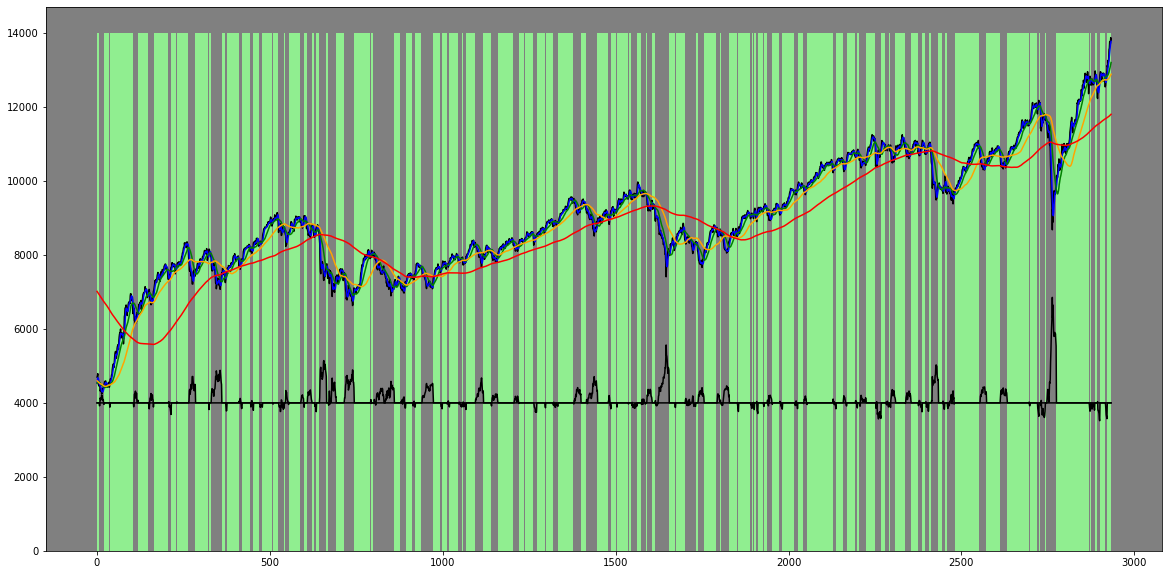

In [15]:
x = np.arange(0,len(date),1)
basic = np.zeros(len(date))
fig = plt.figure(figsize=(20,10))
ax =fig.add_subplot(1,1,1)
ax.bar(x , (keep+14000),color = colors,width = 1.5)
ax.plot(x,close,c='black',label='close')
ax.plot(x , MA5,c='blue',label='5MA')
ax.plot(x , MA20,c='green',label='20MA')
ax.plot(x , MA60,c='orange',label='60MA')
ax.plot(x , MA250,c='red',label='250MA')
ax.plot(x , np.repeat(4000,len(x)),c='black')


ax.plot(x,(unrealized/200)+4000,c='black' )
ax.set_facecolor('gray')
fig.savefig('simple_short.png')

In [59]:
holding

{'number': 0, 'ave_cost': 0, 'realized': -29199.999999999985, 'trading': 23}

In [74]:
analysis(single_result,keep_day,2000000)

{'ret_rate': array([ 0.      , -0.017332, -0.005236,  0.032447,  0.00969 , -0.012919,
        -0.027478, -0.03371 ,  0.13974 , -0.012101, -0.02542 , -0.062281]),
 'cum_ret': array([ 0.      , -0.017332, -0.022568,  0.009879,  0.019569,  0.00665 ,
        -0.020828, -0.054538,  0.085202,  0.073101,  0.047681, -0.0146  ]),
 'max_ret': 0.13974000000000014,
 'min_ret': -0.06228100000000013,
 'stdev_ret': 0.05019404238703553,
 'win_rate': 0.25,
 'ave_keeping': 12.181818181818182}

<BarContainer object of 2934 artists>

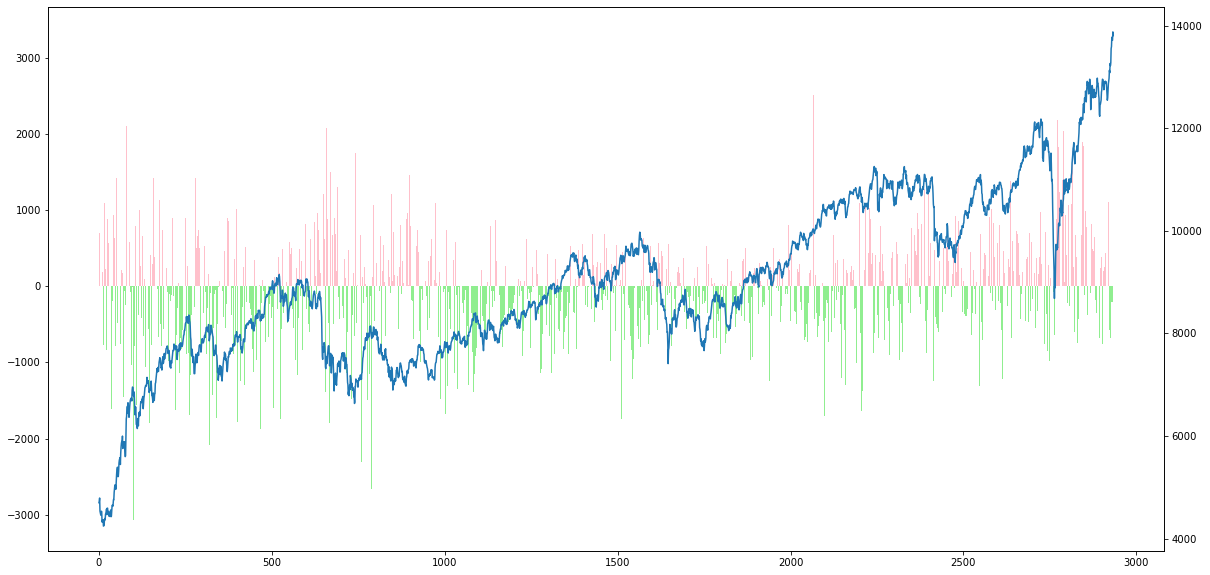

In [145]:
### Add Foreign net BUYING ###

price
F = price['F_netbuying'].values
colorF = np.array([])
colorIP = np.array([])
for i in range(0,len(F)):
    if F[i] < -0.001 :
        colorF = np.append(colorF , 'lightgreen')
    if F[i] >0.001:
        colorF = np.append(colorF , 'pink')
    if IP[i] < -0.001 :
        colorIP = np.append(colorIP , 'lightgreen')
    if IP[i] >0.001:
        colorIP = np.append(colorIP , 'pink')

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()
ax2 = ax.twinx()
ax2.plot(x , close)
#ax.bar(x , F , color = colorF )
ax.bar(x , IP ,color = colorIP)


#ax.scatter(x , Q/800)

(-20000.0, 25000.0)

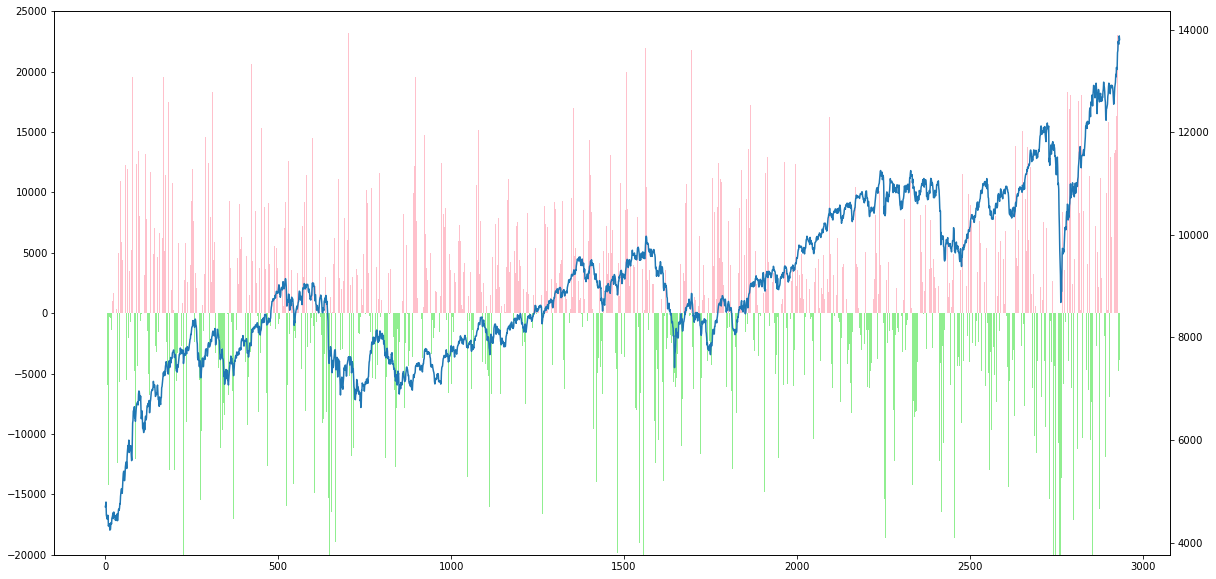

In [148]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()
ax2 = ax.twinx()
ax2.plot(x , close)
ax.bar(x , F , color = colorF )
ax.set_ylim(-20000,25000)
#ax.bar(x , IP ,color = colorIP)